In [22]:
import numpy as np
import pandas as pd
import difflib               #get_close_matches
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('movies.csv')

In [24]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [25]:
# number of rows and columns in the data frame
movies_data.shape

(4803, 24)

In [26]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [27]:
# replacing the null valuess with null string
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [28]:
# combining all the 5 selected features
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']
combined_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [29]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer() 
# helps us in dealing with most frequent words
# TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [30]:
feature_vectors = vectorizer.fit_transform(combined_features)
# The fit_transform() method in Python is used to both fit and transform data in a single step.
# This can be useful when we need to preprocess data before training a model. 
# For example, you might use fit_transform() to scale the data or to remove outliers.

In [31]:
print(feature_vectors)
# "(sentence_index, feature_index) count"

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [32]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [33]:
print(similarity.shape)

(4803, 4803)


In [34]:
def recommend_movies_by_title(movie_name, num_recommendations=10):
    list_of_all_titles = movies_data['title'].tolist()

    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

    if not find_close_match:
        print("No close match found for your input.")
        return

    close_match = find_close_match[0]

    index_of_the_movie = movies_data[movies_data['title'] == close_match].index[0]

    similarity_score = list(enumerate(similarity[index_of_the_movie]))

    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    print('Movies suggested for you:\n')

    for i, movie in enumerate(sorted_similar_movies[:num_recommendations]):
        index = movie[0]
        title_from_index = movies_data.iloc[index]['title']
        print(f"{i + 1}. {title_from_index}")

# User input for movie recommendations
movie_name = input('Enter your favorite movie name: ')
recommend_movies_by_title(movie_name)

Movies suggested for you:

1. Deadpool
2. The Incredible Hulk
3. Iron Man 2
4. X-Men
5. Avengers: Age of Ultron
6. X-Men: Apocalypse
7. Ant-Man
8. The Avengers
9. Thor: The Dark World
10. X2


In [35]:
# Get user input for a single genre
user_genre = input('Enter a genre (e.g., action, adventure): ')

# Filter movies based on the user's genre input
filtered_movies = movies_data[movies_data['genres'].str.lower().str.contains(user_genre.lower(), case=False)]

if filtered_movies.empty:
    print(f"No movies found for the specified genre: {user_genre}.")
else:
    # Get movie suggestions for the selected genre
    print(f'Movies suggested for you based on the genre: {user_genre}')

    L = filtered_movies['title'].tolist()
    i = 1
    for item in L:
        print(i, '.',item,end="\n")
        i+=1

Movies suggested for you based on the genre: action romance
1 . Prince of Persia: The Sands of Time
2 . The Saint
3 . Top Gun
4 . Crouching Tiger, Hidden Dragon
5 . House of Flying Daggers
6 . Kites
7 . Henry V
8 . Logan's Run
9 . The Misfits
10 . London


C:\Users\jaisw\AppData\Local\Temp\ipykernel_15120\1055226679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres['title'], y=top_10_genres['vote_average'], palette='magma')
c:\Users\jaisw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jaisw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

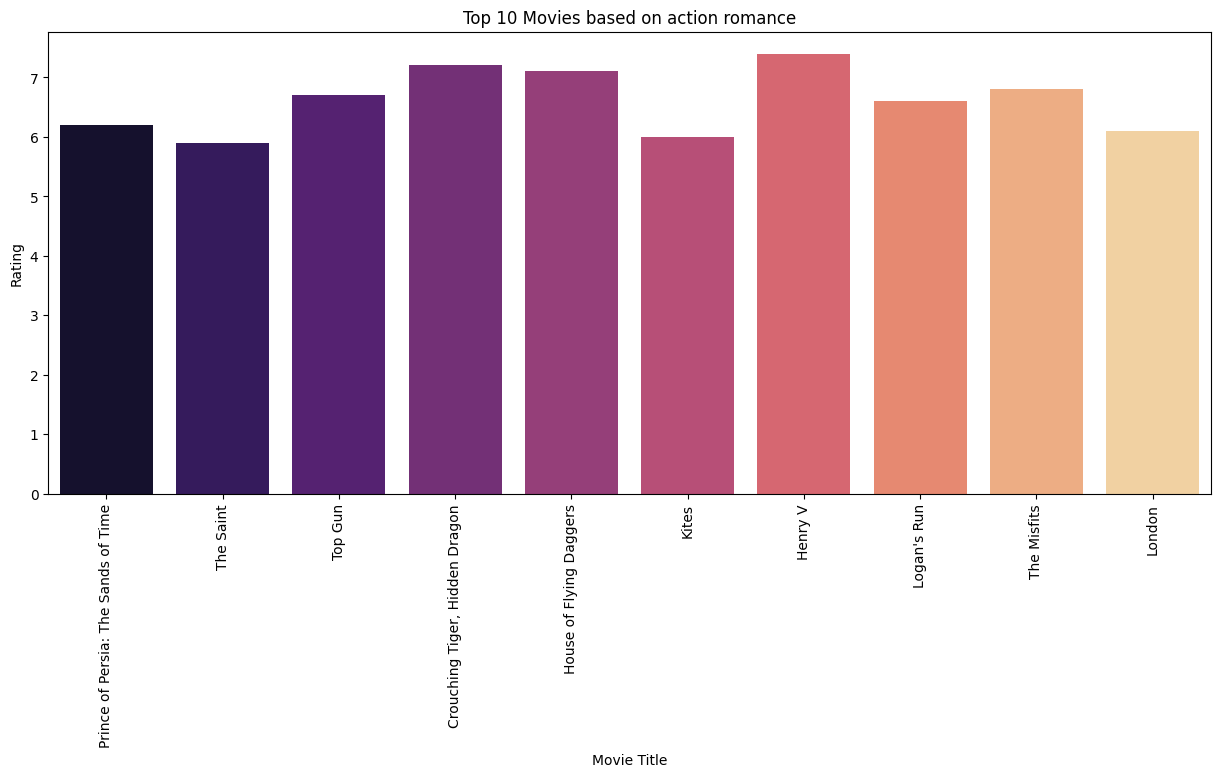

In [36]:
# Visualize the top 10 rows of data for the selected genre
top_10_genres = filtered_movies.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_genres['title'], y=top_10_genres['vote_average'], palette='magma')
plt.title(f'Top 10 Movies based on {user_genre}')
plt.xlabel('Movie Title')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()

In [37]:
# Listing the Title based on Director
movie_director = input(' Enter your favourite Director name : ')

list_of_all_titles = movies_data[movies_data['director'].str.lower().str.contains(movie_director.lower(), case=False)]

if list_of_all_titles.empty:
    print(f"No movies found directed by {movie_director}.")
else:
    print(f'Movies directed by {movie_director} : \n')
    L = list_of_all_titles['title'].tolist()
    i = 1
    for item in L:
        print(i, '.',item,end="\n")
        i+=1

Movies directed by James Cameron : 

1 . Avatar
2 . Titanic
3 . Terminator 2: Judgment Day
4 . True Lies
5 . The Abyss
6 . Aliens
7 . The Terminator


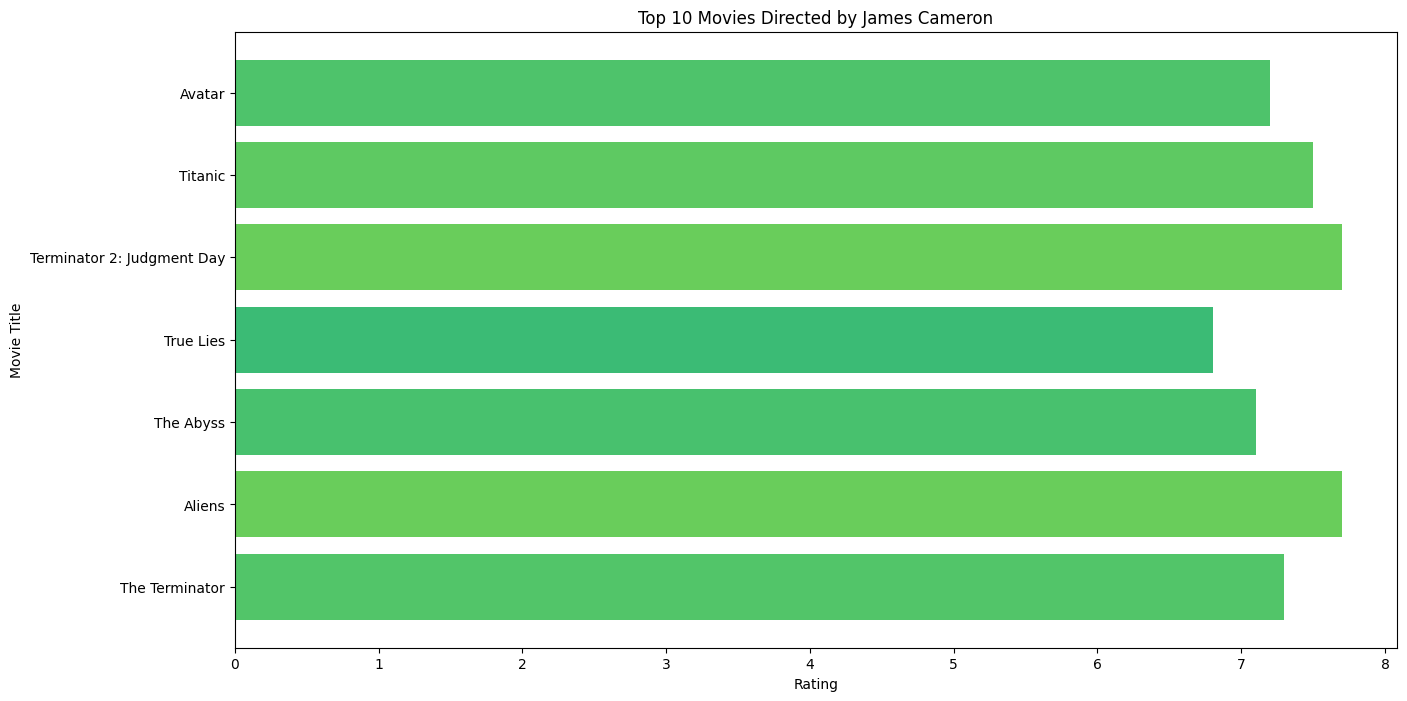

In [38]:
top_10_director_movies = list_of_all_titles.head(10)

if not top_10_director_movies.empty:
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(top_10_director_movies['vote_average'] / 10.0)  # Color based on rating

    plt.barh(top_10_director_movies['title'], top_10_director_movies['vote_average'], color=colors)
    plt.title(f'Top 10 Movies Directed by {movie_director}')
    plt.xlabel('Rating')
    plt.ylabel('Movie Title')
    plt.gca().invert_yaxis()  # Invert the order to show the highest rated at the top
    plt.show()

In [39]:
# Listing the Title based on Average Vote
movie_rating = float(input(' Enter your Movie Rating Preferences between (0 - 10) : '))

list_of_all_titles = movies_data[movies_data['vote_average']>=movie_rating]

if list_of_all_titles.empty:
    print(f"No movies found within the specified vote average range.")
else:
    print("Movie Rating greater than or equal to",movie_rating,": \n")
    L = list_of_all_titles['title'].tolist()    
    i = 1
    for item in L:
        print(i, '.',item,end="\n")
        i+=1

Movie Rating greater than or equal to 8.9 : 

1 . One Man's Hero
2 . Stiff Upper Lips
3 . Sardaarji
4 . Dancer, Texas Pop. 81
5 . Me You and Five Bucks
6 . Little Big Top


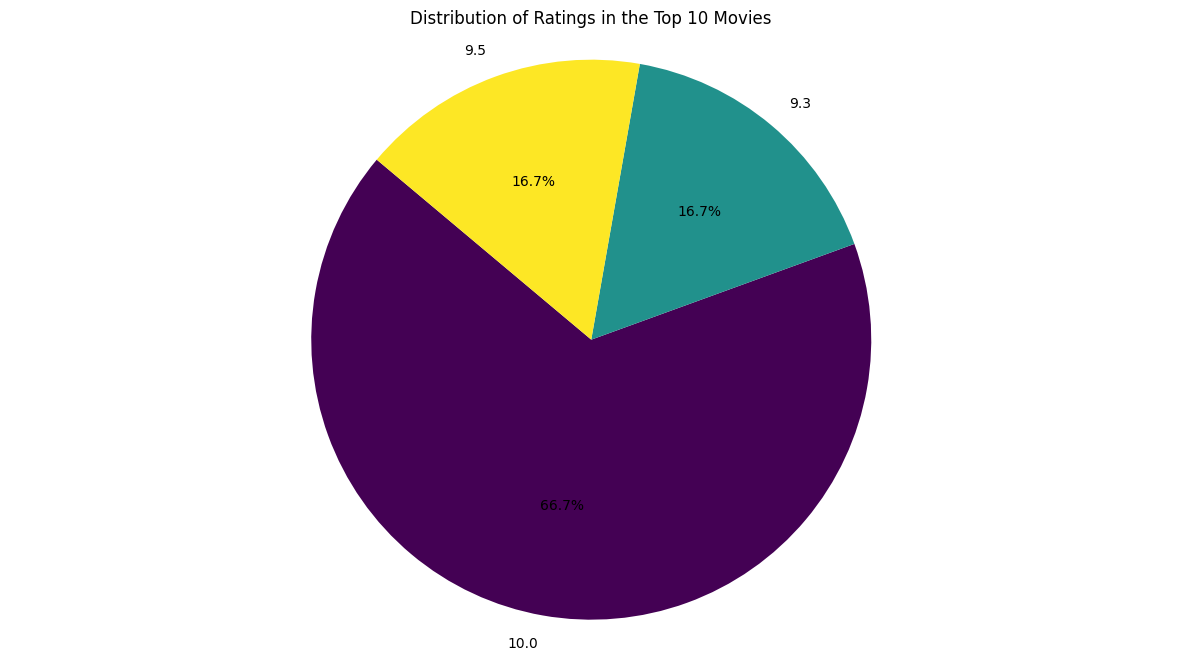

In [40]:
top_10_rating_movies = list_of_all_titles.head(10)

if not top_10_rating_movies.empty:
    plt.figure(figsize=(15, 8))
    
    # Count the number of movies in different rating categories
    rating_counts = top_10_rating_movies['vote_average'].value_counts()
    
    # Create the pie chart
    labels = rating_counts.index
    sizes = rating_counts.values
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Ratings in the Top 10 Movies')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [41]:
# Get user input for budget range
min_budget = float(input('Enter minimum budget: '))
max_budget = float(input('Enter maximum budget: '))

# Filter movies based on budget range
filtered_movies = movies_data[(movies_data['budget'] >= min_budget) & (movies_data['budget'] <= max_budget)]

if filtered_movies.empty:
    print("No movies found within the specified budget range.")
else:
    print('Movies suggested for you based on the budget range:')
    L = filtered_movies['title'].tolist()    
    i = 1
    for item in L:
        print(i, '.',item,end="\n")
        i+=1


Movies suggested for you based on the budget range:
1 . Avatar
2 . Pirates of the Caribbean: At World's End
3 . Spectre
4 . The Dark Knight Rises
5 . John Carter
6 . Spider-Man 3
7 . Tangled
8 . Avengers: Age of Ultron
9 . Harry Potter and the Half-Blood Prince
10 . Batman v Superman: Dawn of Justice
11 . Superman Returns
12 . The Lone Ranger
13 . The Hobbit: The Battle of the Five Armies
14 . The Hobbit: The Desolation of Smaug
15 . Captain America: Civil War
16 . X-Men: Days of Future Past
17 . The Hobbit: An Unexpected Journey


C:\Users\jaisw\AppData\Local\Temp\ipykernel_15120\2316179560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_budget_movies['title'], y=top_10_budget_movies['budget'] / 1e6, palette='coolwarm')
c:\Users\jaisw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jaisw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

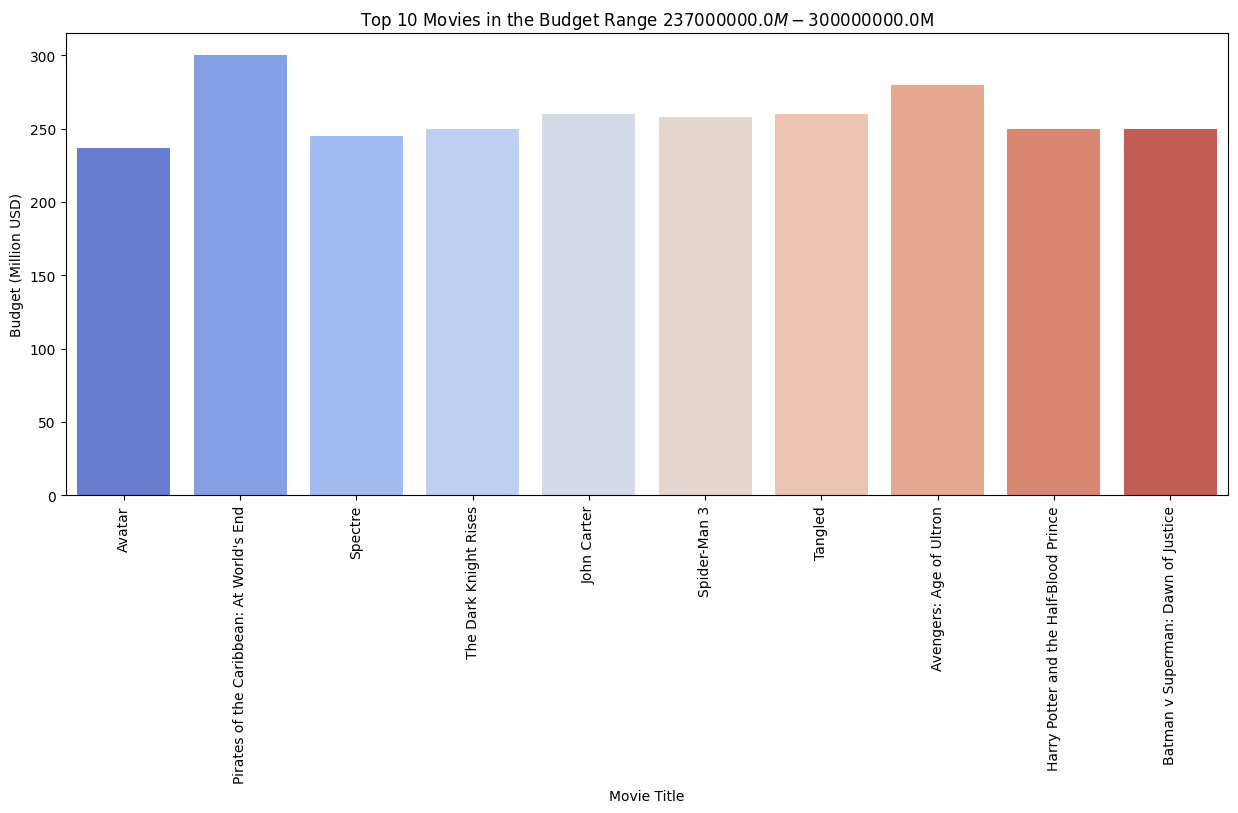

In [42]:
# Visualize the top 10 rows of data for the selected budget range
top_10_budget_movies = filtered_movies.head(10)

if not top_10_budget_movies.empty:
    plt.figure(figsize=(15, 6))
    sns.barplot(x=top_10_budget_movies['title'], y=top_10_budget_movies['budget'] / 1e6, palette='coolwarm')
    plt.title(f'Top 10 Movies in the Budget Range ${min_budget}M - ${max_budget}M')
    plt.xlabel('Movie Title')
    plt.xticks(rotation=90)
    plt.ylabel('Budget (Million USD)')
    plt.show()

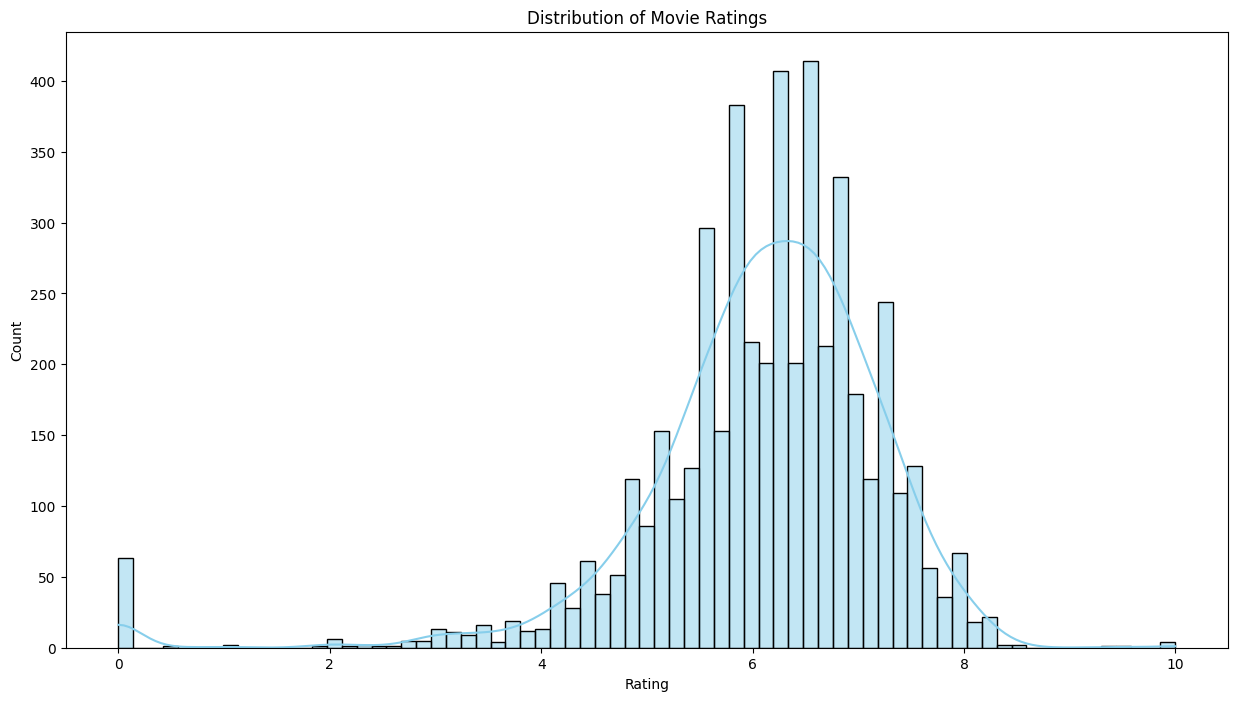

In [43]:
# Visualize the distribution of movie ratings
plt.figure(figsize=(15, 8))
sns.histplot(movies_data['vote_average'], kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

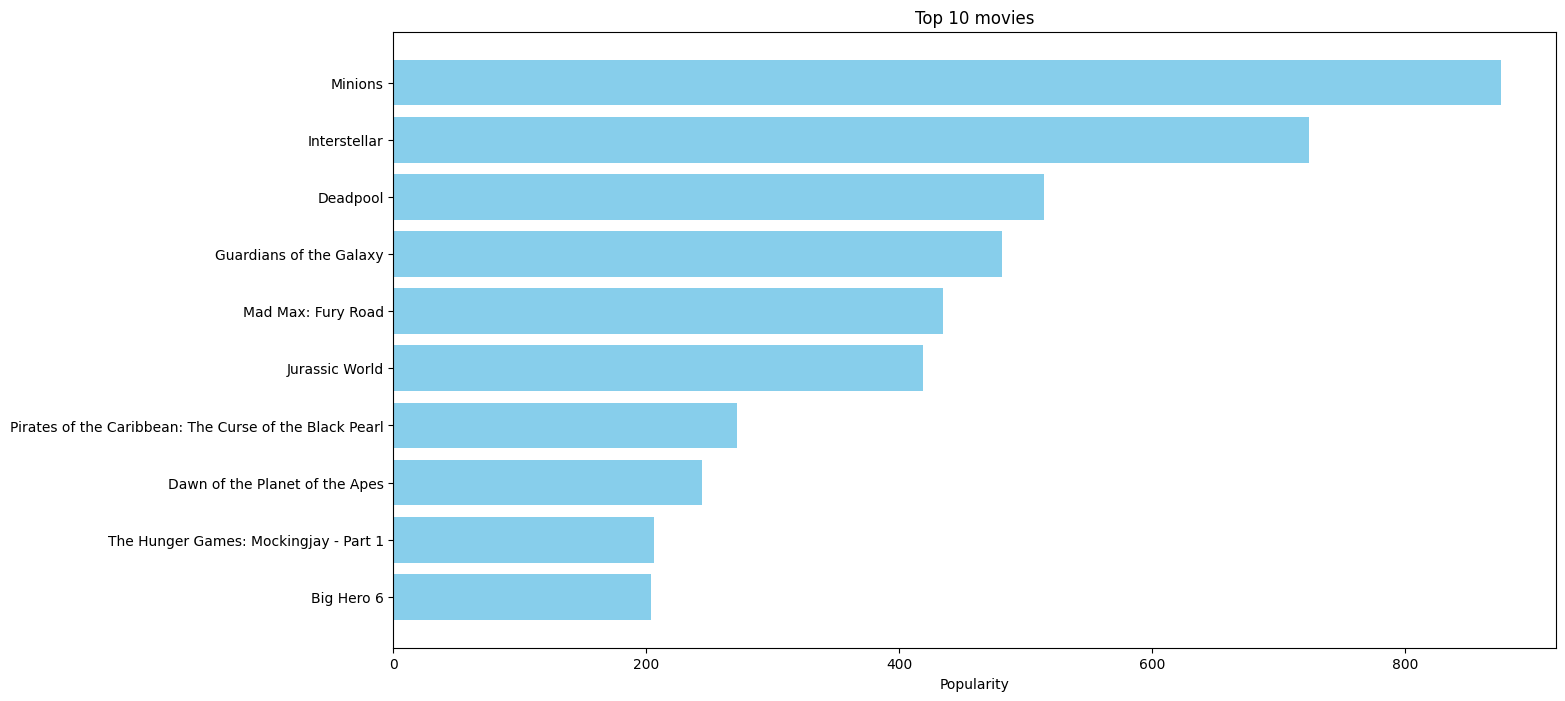

In [44]:
# Plot top 10 movies

popularity = movies_data.sort_values("popularity", ascending=False)
plt.figure(figsize=(15, 8))
plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 10 movies")
plt.xlabel("Popularity")
plt.show()
